<a href="https://colab.research.google.com/github/KANGladiator/EV_Data_analysis_Kanishk/blob/main/EV_Market_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EV DATA ANALYSIS BY KANISHK SINGH

In [ ]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

##2. Indian State EV Count dataset

In [ ]:
read_file = pd.read_excel("/content/ev_data/2.EV-States-Dataset.xlsx")
read_file.to_csv("ev_data/2.ev_usage_india.csv",
                 index = None,
                 header = True)

df = pd.DataFrame(pd.read_csv("ev_data/2.ev_usage_india.csv", skiprows=1, header=0))

df

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162,146945,147107
1,2,Arunachal Pradesh,20,252965,252985
2,3,Assam,64766,4677053,4741819
3,4,Bihar,83335,10407078,10490413
4,5,Chandigarh,2812,746881,749693
5,6,Chhattisgarh,20966,6836200,6857166
6,7,Delhi,156393,7685600,7841993
7,8,Goa,3870,1071570,1075440
8,9,Gujarat,45272,20605484,20650756
9,10,Haryana,37035,10778270,10815305


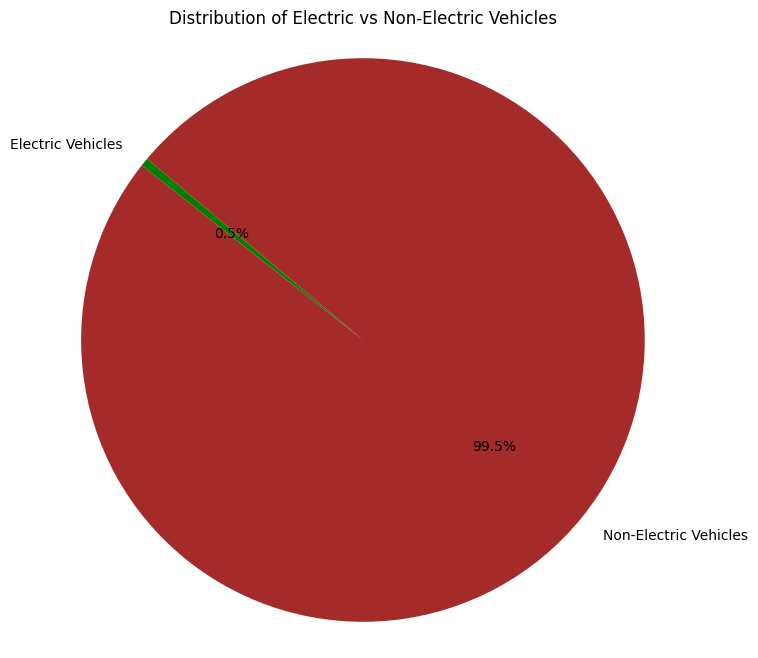

In [ ]:
# Calculate total counts of electric and non-electric vehicles
total_electric_vehicles = df.loc[df['State Name'] != 'Grand Total', 'Total Electric Vehicle'].sum()
total_non_electric_vehicles = df.loc[df['State Name'] != 'Grand Total', 'Total Non-Electric Vehicle'].sum()
# Create pie chart
labels = ['Electric Vehicles', 'Non-Electric Vehicles']
sizes = [total_electric_vehicles, total_non_electric_vehicles]
colors = ['green', 'brown']


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.title('Distribution of Electric vs Non-Electric Vehicles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<ipython-input-5-58ad648ec220>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Vehicles'] = df['Total Electric Vehicle'] + df['Total Non-Electric Vehicle']


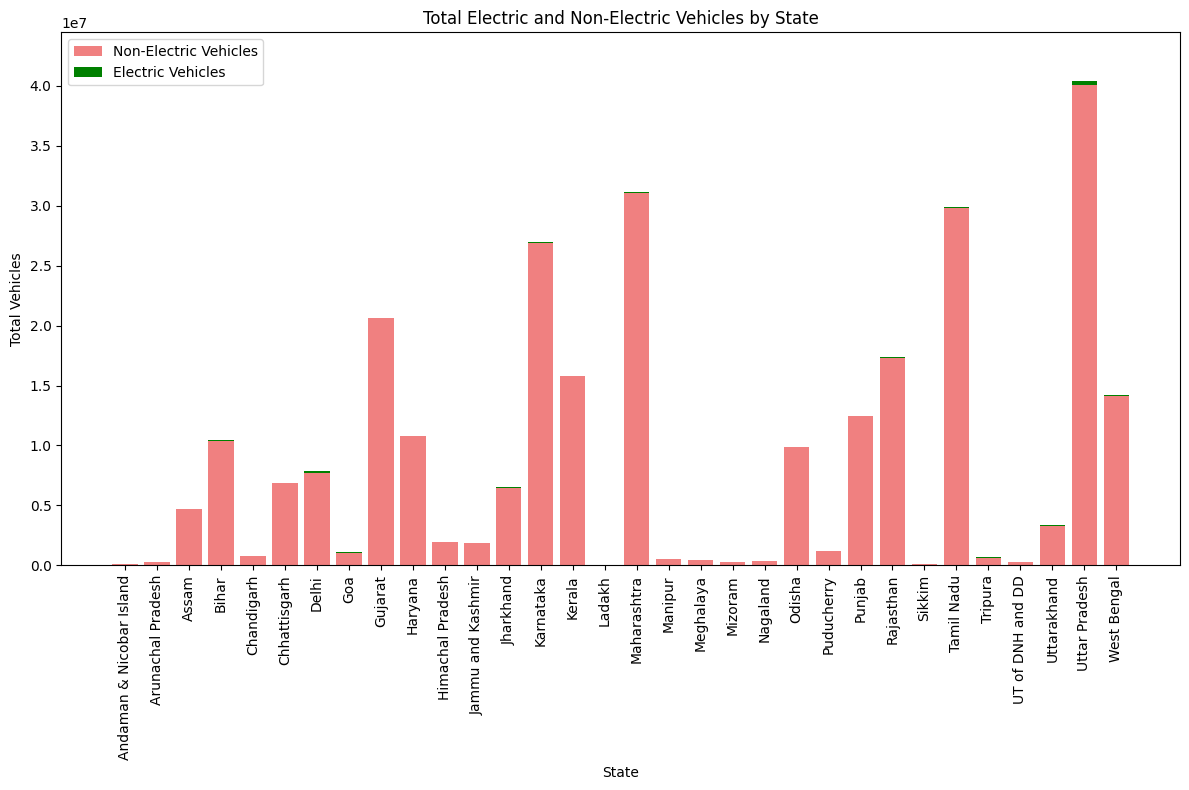

In [ ]:
df = df[df['State Name'] != 'Grand Total']

# Calculate the total number of vehicles (electric and non-electric) for each state
df['Total Vehicles'] = df['Total Electric Vehicle'] + df['Total Non-Electric Vehicle']

# Create a stacked bar plot
plt.figure(figsize=(12, 8))
plt.bar(df['State Name'], df['Total Non-Electric Vehicle'], label='Non-Electric Vehicles', color='lightcoral')
plt.bar(df['State Name'], df['Total Electric Vehicle'], bottom=df['Total Non-Electric Vehicle'], label='Electric Vehicles', color='green')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Vehicles')
plt.title('Total Electric and Non-Electric Vehicles by State')
plt.legend()

# Set y-axis limits to ensure all vehicles are visible
plt.ylim(0, df['Total Vehicles'].max() * 1.1)

plt.tight_layout()
plt.show()

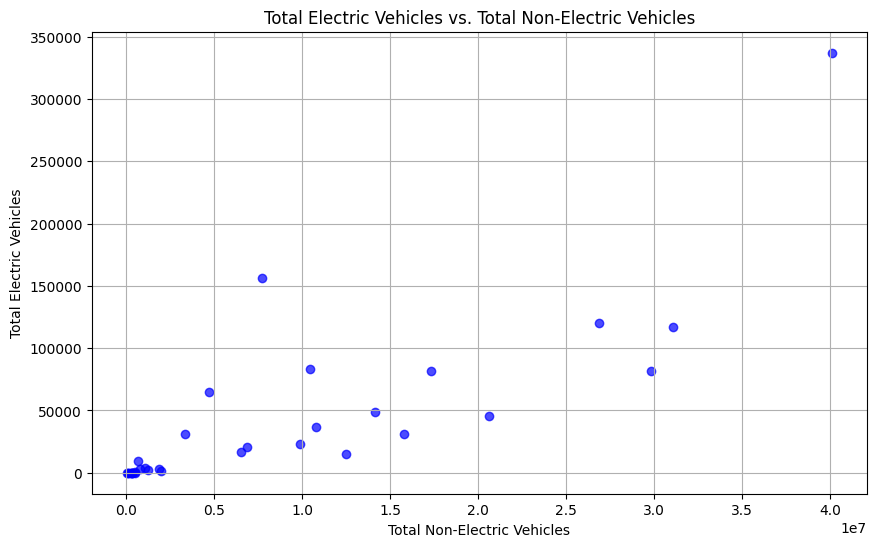

In [ ]:
# Remove the "Grand Total" row
df = df[df['State Name'] != 'Grand Total']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Total Non-Electric Vehicle'], df['Total Electric Vehicle'], color='blue', alpha=0.7)
plt.xlabel('Total Non-Electric Vehicles')
plt.ylabel('Total Electric Vehicles')
plt.title('Total Electric Vehicles vs. Total Non-Electric Vehicles')
plt.grid(True)
plt.show()

###Clustetering this using KMeans to get EV distributions

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


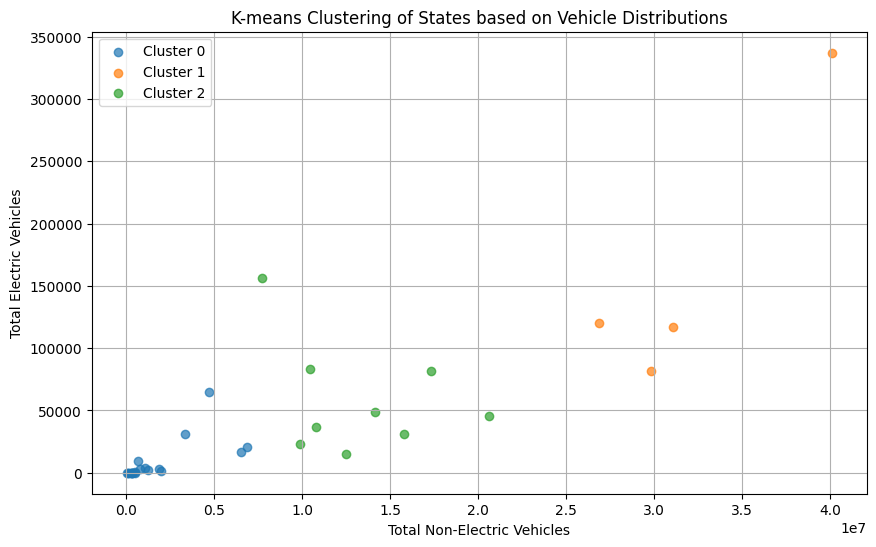

In [ ]:
from sklearn.cluster import KMeans
# Remove the "Grand Total" row
df = df[df['State Name'] != 'Grand Total']

# Prepare the data for clustering
X = df[['Total Electric Vehicle', 'Total Non-Electric Vehicle']]

# Choose the number of clusters
n_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_label in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Total Non-Electric Vehicle'], cluster_data['Total Electric Vehicle'], label=f'Cluster {cluster_label}', alpha=0.7)
plt.xlabel('Total Non-Electric Vehicles')
plt.ylabel('Total Electric Vehicles')
plt.title('K-means Clustering of States based on Vehicle Distributions')
plt.legend()
plt.grid(True)
plt.show()

###Using K means to get adoption rate of EVs

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


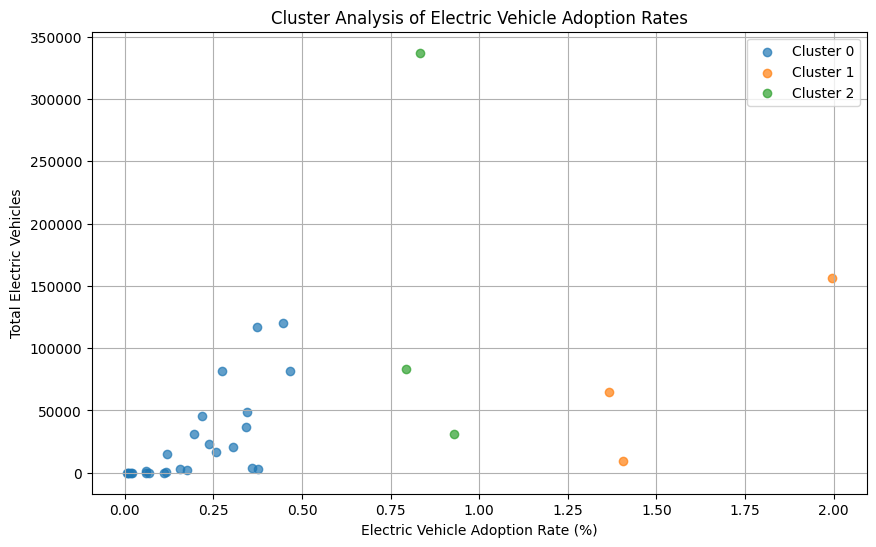

In [ ]:
# Calculate electric vehicle adoption rates (percentage of electric vehicles out of total vehicles)
df['Electric Vehicle Adoption Rate'] = (df['Total Electric Vehicle'] / (df['Total Electric Vehicle'] + df['Total Non-Electric Vehicle'])) * 100

# Prepare the data for clustering
X = df[['Electric Vehicle Adoption Rate']]

# Choose the number of clusters
n_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_label in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Electric Vehicle Adoption Rate'], cluster_data['Total Electric Vehicle'], label=f'Cluster {cluster_label}', alpha=0.7)
plt.xlabel('Electric Vehicle Adoption Rate (%)')
plt.ylabel('Total Electric Vehicles')
plt.title('Cluster Analysis of Electric Vehicle Adoption Rates')
plt.legend()
plt.grid(True)
plt.show()

##3. Dataset of EV in the Global market

In [ ]:
read_file = pd.read_excel("/content/ev_data/3.EV-Market-Global-Dataset.xlsx")
read_file.to_csv("ev_data/3.ev_market_global_data.csv",
                 index = None,
                 header = True)

df = pd.DataFrame(pd.read_csv("ev_data/3.ev_market_global_data.csv"))

df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


<Axes: title={'center': 'Efficiency_WhKm'}, xlabel='BodyStyle'>

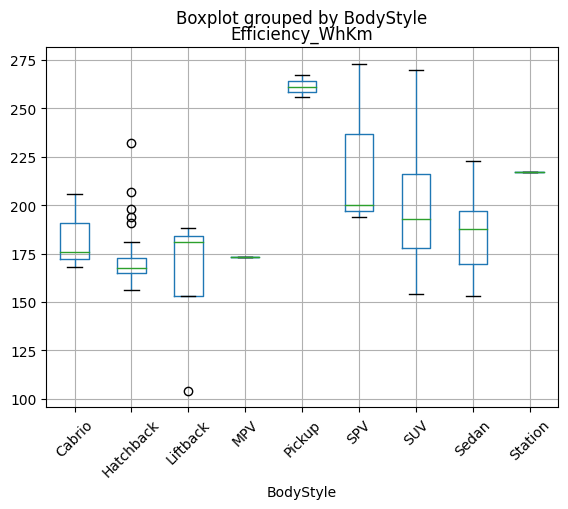

In [ ]:
# @title Efficiency by Body Style

df.boxplot(column='Efficiency_WhKm', by='BodyStyle', rot=45)

### Scatter Plot of range vs Efficiency

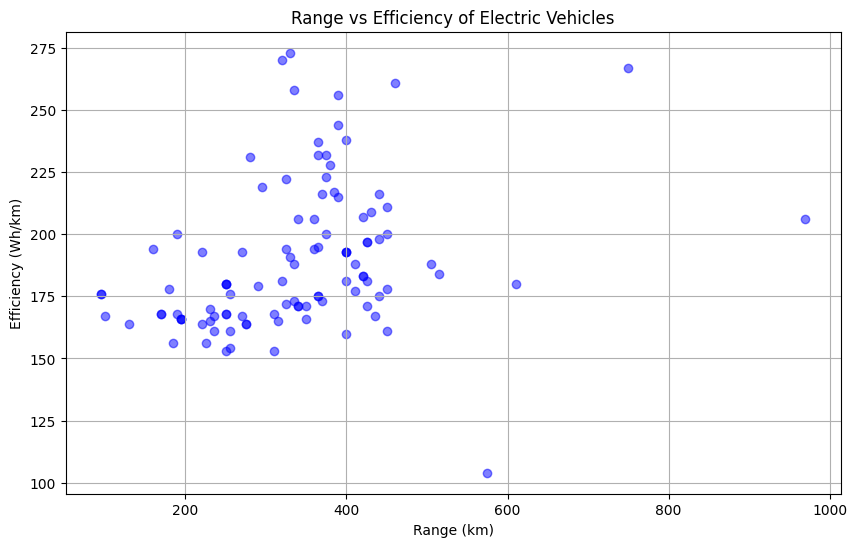

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Range_Km'], df['Efficiency_WhKm'], color='blue', alpha=0.5)
plt.title('Range vs Efficiency of Electric Vehicles')
plt.xlabel('Range (km)')
plt.ylabel('Efficiency (Wh/km)')
plt.grid(True)
plt.show()

### Average Efficiency by brand

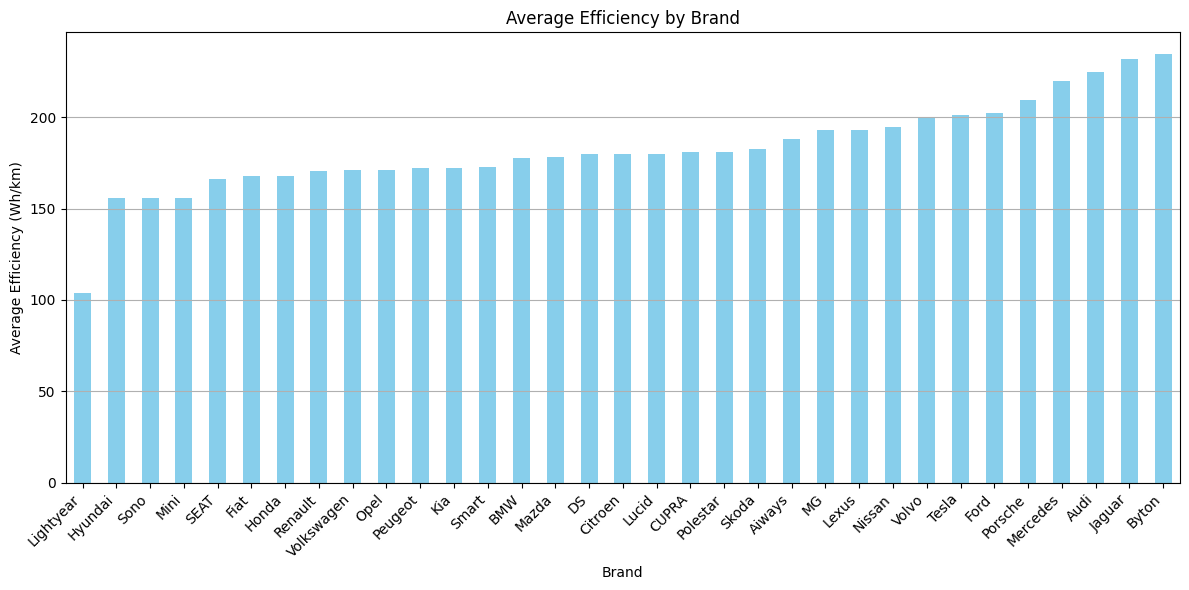

In [ ]:
avg_efficiency_by_brand = df.groupby('Brand')['Efficiency_WhKm'].mean().sort_values()

plt.figure(figsize=(12, 6))
avg_efficiency_by_brand.plot(kind='bar', color='skyblue')
plt.title('Average Efficiency by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Efficiency (Wh/km)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

###Segment Distribution

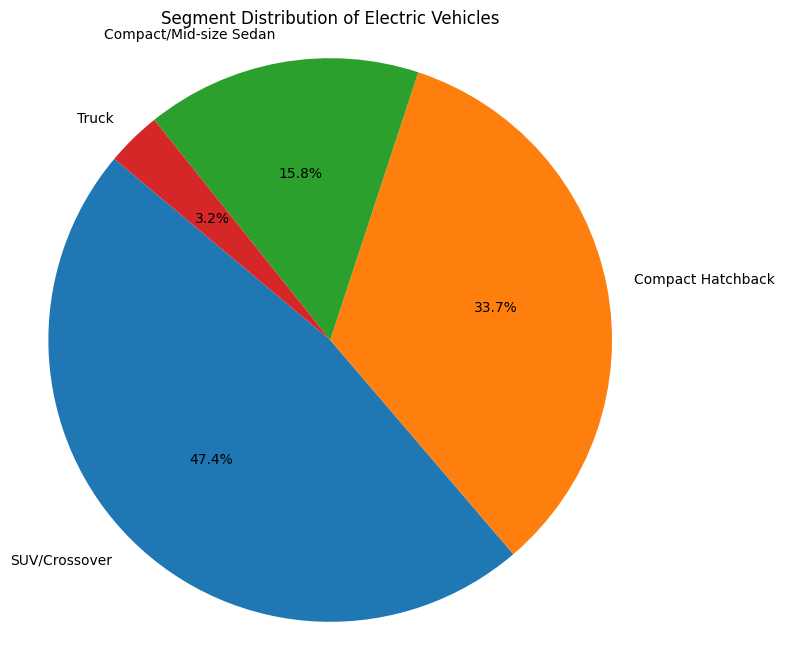

In [ ]:
# Define mapping of body styles to market segments
segment_mapping = {
    'Sedan': 'Compact/Mid-size Sedan',
    'Hatchback': 'Compact Hatchback',
    'SUV': 'SUV/Crossover',
    'Liftback': 'Compact/Mid-size Sedan',
    'Van': 'Van/Minivan',
    'Pickup': 'Truck',
    # Add more mappings as needed
}

# Map body styles to market segments
df['Segment'] = df['BodyStyle'].map(segment_mapping)

# Calculate count of EVs in each segment
segment_distribution = df['Segment'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_distribution, labels=segment_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Segment Distribution of Electric Vehicles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

###K-means Clustering of EV Models

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
   AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm
0 -0.496168      0.292448  0.353574         1.821195
1  0.921747     -0.798843 -0.963864        -0.655140
2 -0.149495     -0.117867  0.348590        -0.245407
3 -1.324160      1.888160  1.099513         0.218705


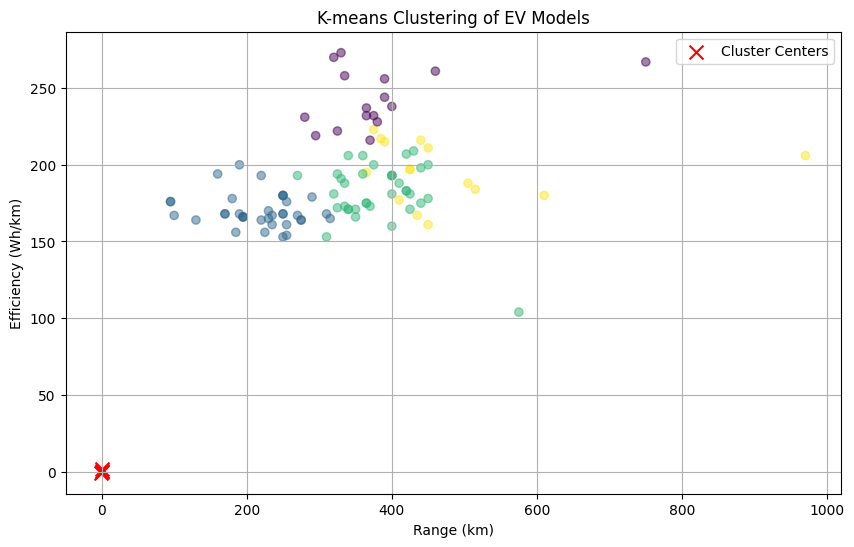

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Select relevant features for clustering
features = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm']

# Prepare the data
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (you can adjust this based on your requirements)
n_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("Cluster Centers:")
print(cluster_centers)

# Visualize the clusters (you can plot any two features for visualization)
plt.figure(figsize=(10, 6))
plt.scatter(df['Range_Km'], df['Efficiency_WhKm'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers['Range_Km'], cluster_centers['Efficiency_WhKm'], marker='x', c='red', s=100, label='Cluster Centers')
plt.title('K-means Clustering of EV Models')
plt.xlabel('Range (km)')
plt.ylabel('Efficiency (Wh/km)')
plt.legend()
plt.grid(True)
plt.show()


### Principal Component Analysis

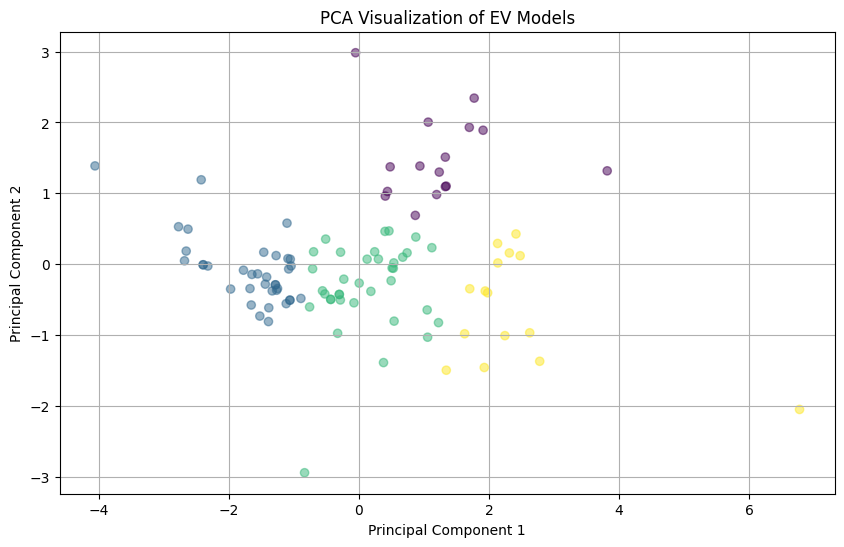

In [ ]:
from sklearn.decomposition import PCA


# Select relevant features for PCA
features = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm']

# Prepare the data
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('PCA Visualization of EV Models')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


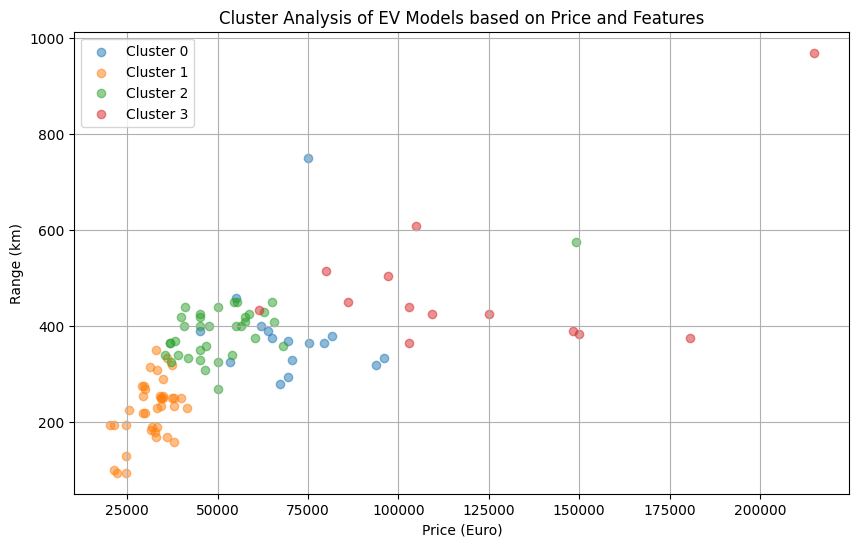

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select relevant features including price for clustering
features = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'PriceEuro']

# Prepare the data
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters
n_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster_Price_Features'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_label in range(n_clusters):
    cluster_data = df[df['Cluster_Price_Features'] == cluster_label]
    plt.scatter(cluster_data['PriceEuro'], cluster_data['Range_Km'], label=f'Cluster {cluster_label}', alpha=0.5)
plt.title('Cluster Analysis of EV Models based on Price and Features')
plt.xlabel('Price (Euro)')
plt.ylabel('Range (km)')
plt.legend()
plt.grid(True)
plt.show()


## 4.Dataset of EV in the Indian market

In [ ]:
df = pd.DataFrame(pd.read_csv("/content/ev_data/4.EV-India-Dataset.csv"))

df

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,na,Premium Dual Tone,HSE
5,Jaguar I-Pace,Premium Midsize Sedan,470 Km/Full Charge,Automatic,Electric,₹ 1.06 - 1.12 Cr,5 Seater,656 L,S,Sportback 55
6,Audi E-Tron GT,Premium Coupe,388 Km/Full Charge,Automatic,Electric,₹ 1.8 Cr,5 Seater,405 L,Quattro,na
7,BYD E6,Subcompact MPV,415 Km/Full Charge,Automatic,Electric,₹ 29.15 L,5 Seater,580 L,STD,na
8,Mercedes-Benz EQC,Compact SUV,471 Km/Full Charge,Automatic,Electric,₹ 1 Cr,5 Seater,na,na,na
9,BMW iX,Premium Fullsize SUV,425 Km/Full Charge,Automatic,Electric,₹ 1.16 Cr,5 Seater,na,na,na


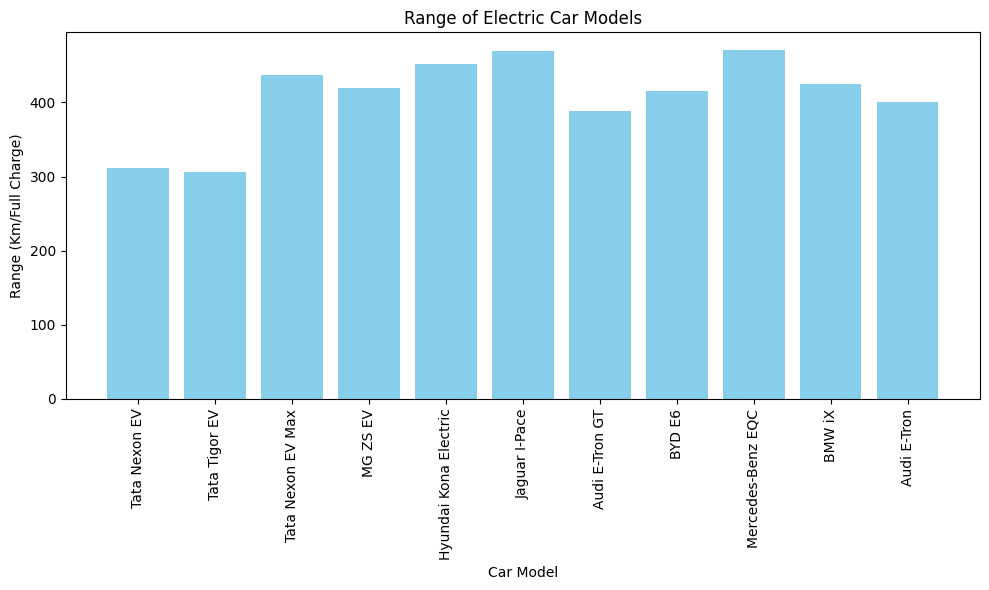

In [ ]:
df['Range'].dtype
df['Range'] = df['Range'].astype(str)
df['Range'] = df['Range'].str.extract('(\d+)').astype(float)


plt.figure(figsize=(10, 6))
plt.bar(df['Car'], df['Range'], color='skyblue')
plt.xlabel('Car Model')
plt.ylabel('Range (Km/Full Charge)')
plt.title('Range of Electric Car Models')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


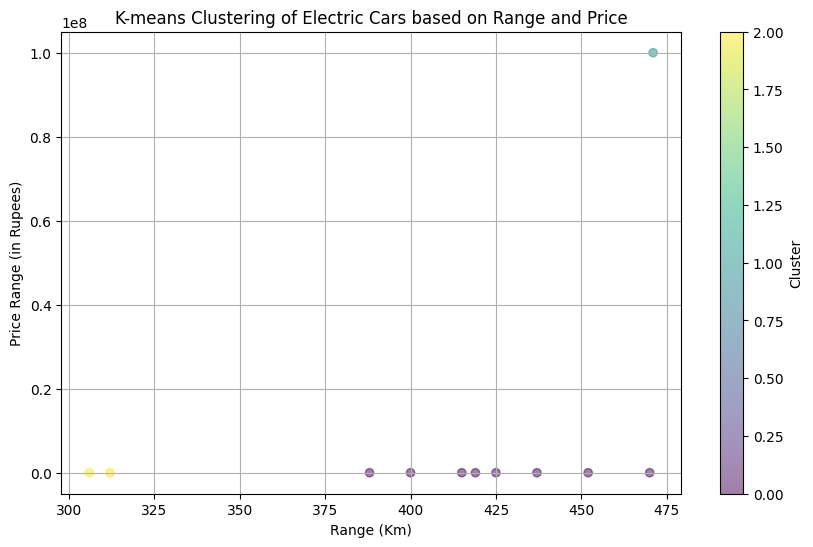

In [ ]:
# Filter electric cars
electric_cars = df[df['VehicleType'] == 'Electric']

# Drop rows where range or price is missing
electric_cars.dropna(subset=['Range', 'PriceRange'], inplace=True)

# Convert 'Range' and 'PriceRange' columns to numeric
electric_cars['Range'] = pd.to_numeric(electric_cars['Range'], errors='coerce')

def extract_price(price):
    if isinstance(price, float):
        return price
    else:
        return float(price.split('₹')[1].replace('L', '').replace('Cr', ''))

electric_cars['PriceRange'] = electric_cars['PriceRange'].apply(extract_price)

# Remove rows with missing values after conversion
electric_cars.dropna(subset=['Range', 'PriceRange'], inplace=True)

# Select features for clustering (Range and PriceRange)
X = electric_cars[['Range', 'PriceRange']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add cluster labels to the dataframe
electric_cars['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(x=electric_cars['Range'], y=electric_cars['PriceRange'], c=electric_cars['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Range (Km)')
plt.ylabel('Price Range (in Rupees)')
plt.title('K-means Clustering of Electric Cars based on Range and Price')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()